In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

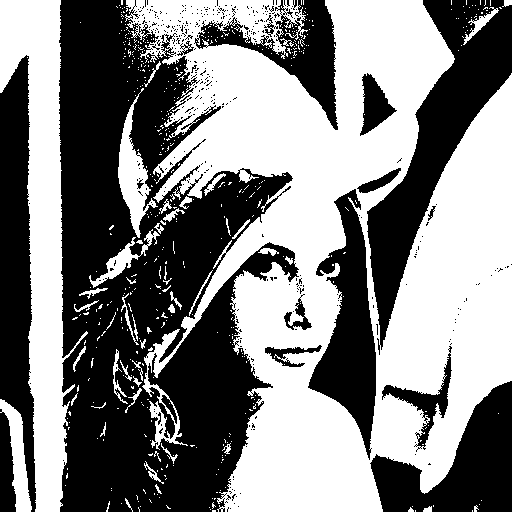

In [ ]:
binarize_lena = lena_gray//128*255
cv2_imshow(binarize_lena)

In [ ]:
lena_gray

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

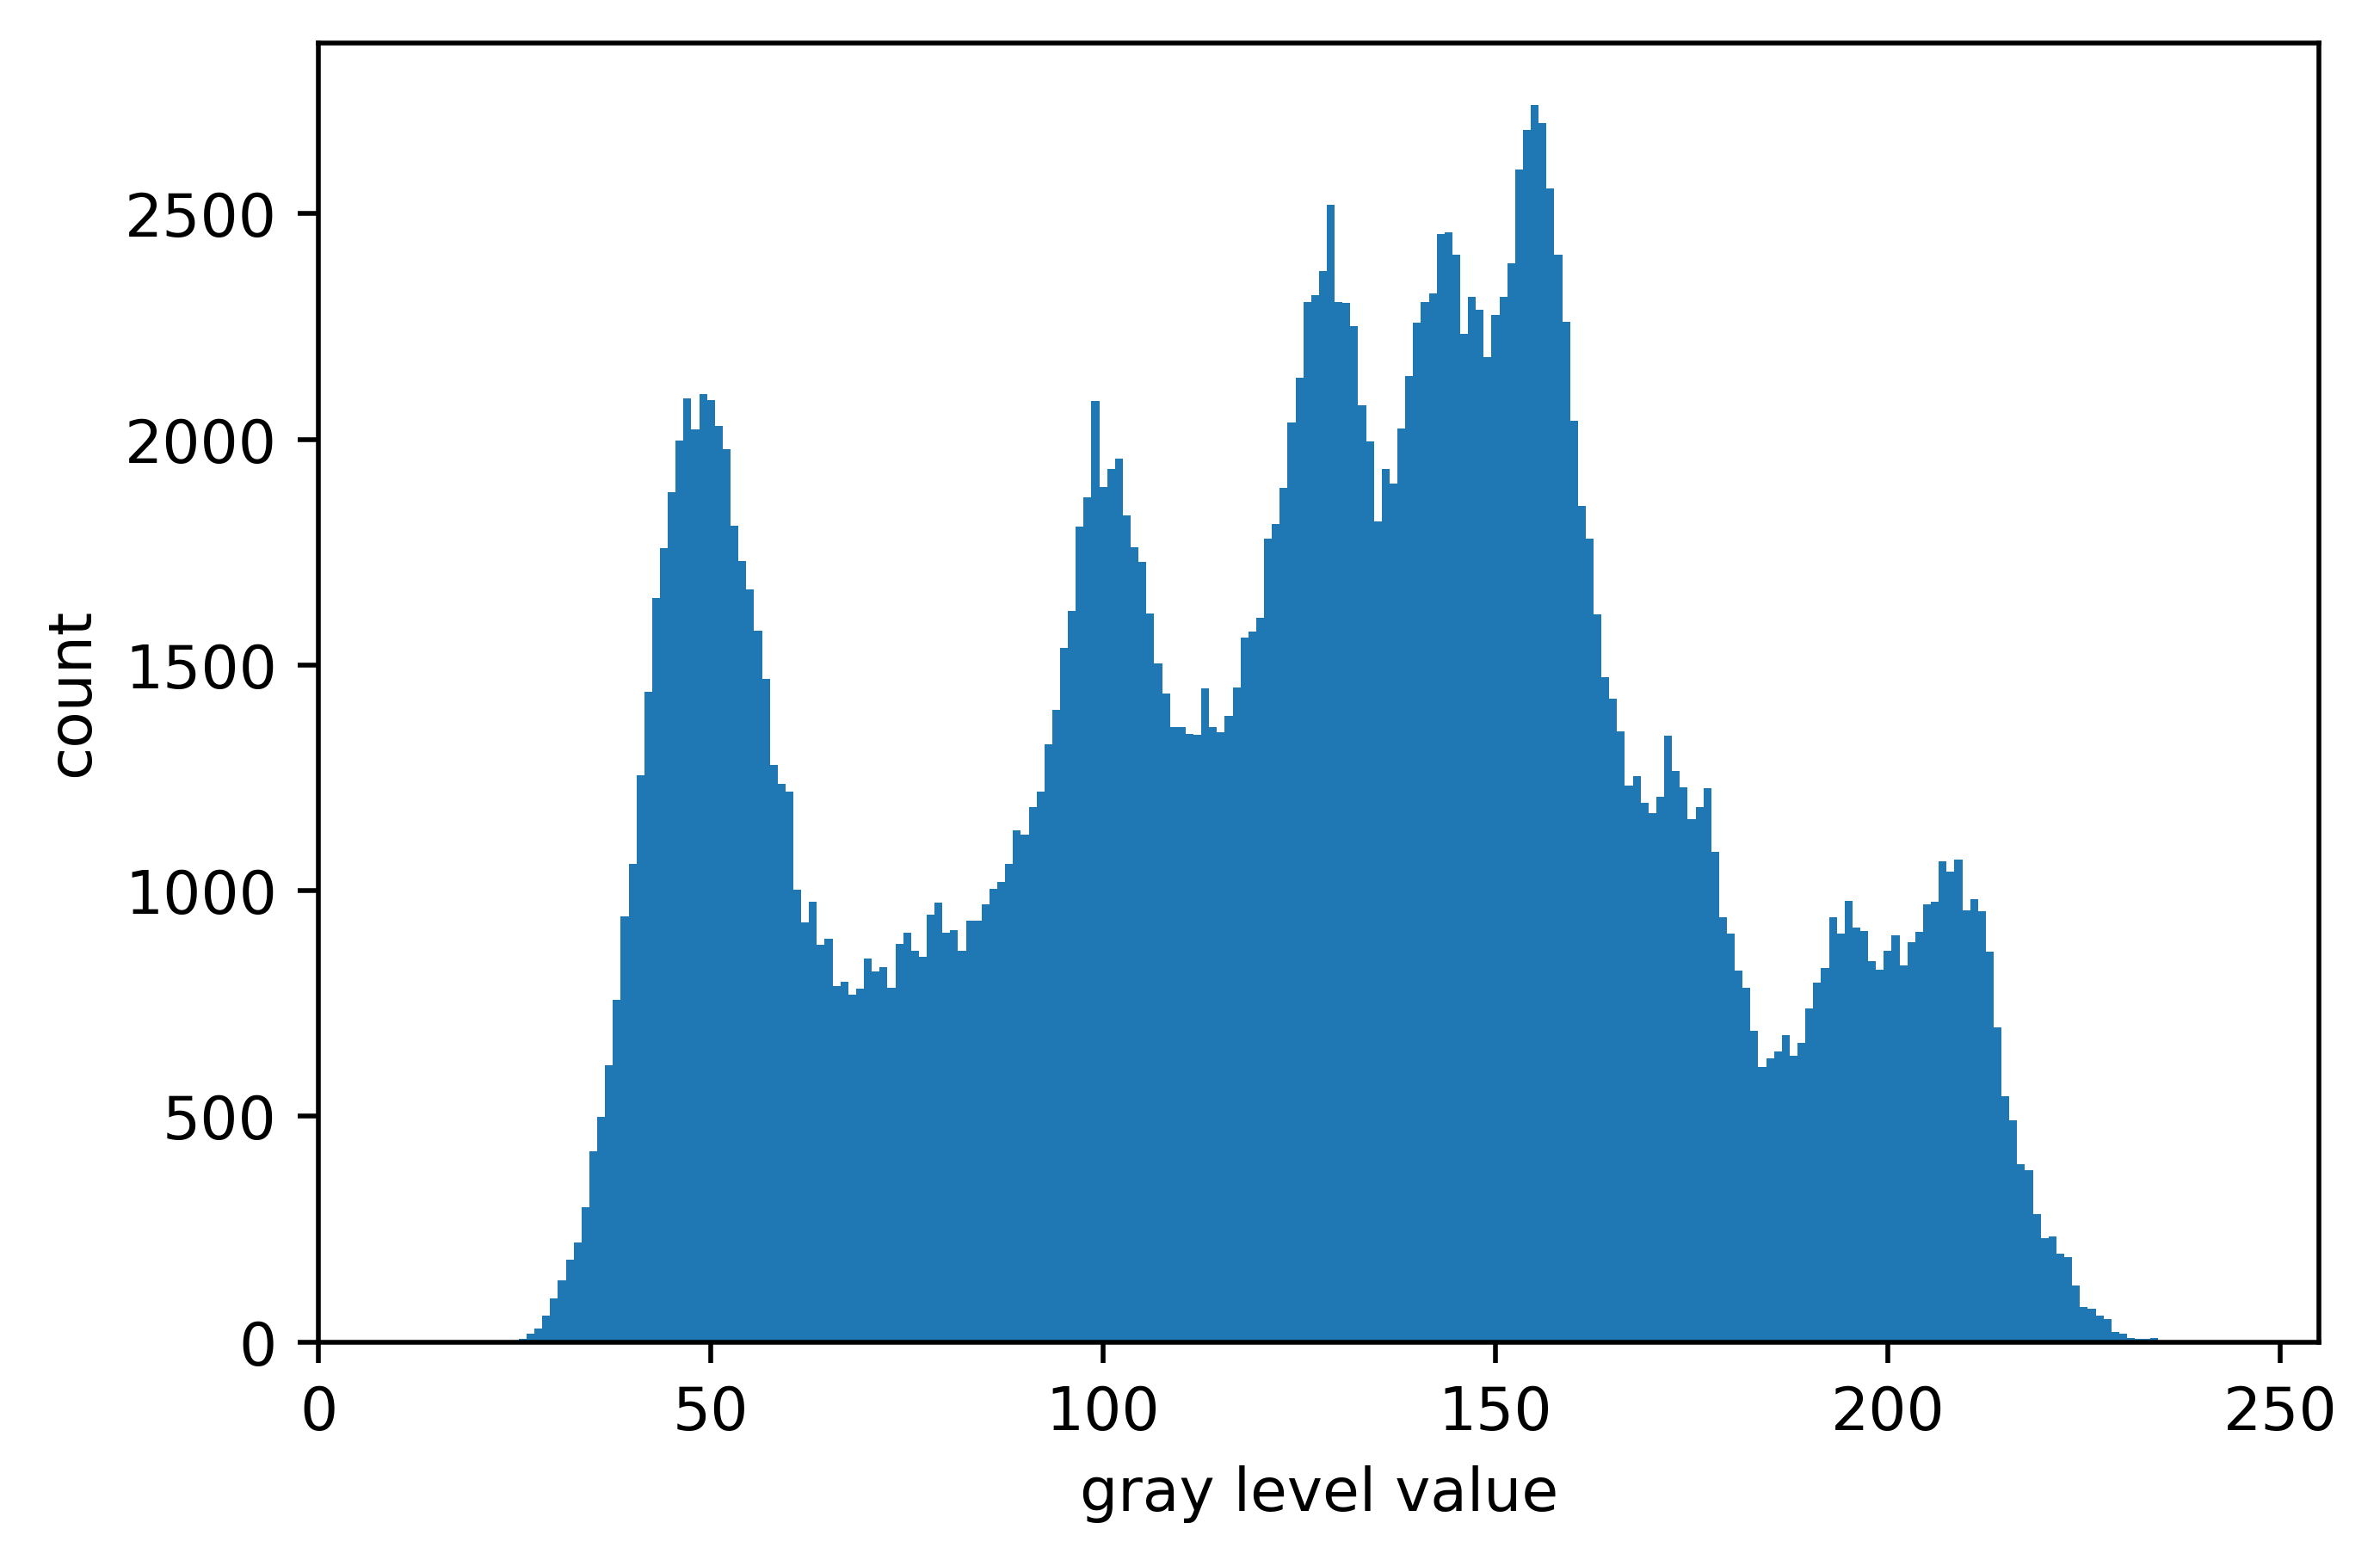

In [ ]:
value_count = [0]*256
for row in lena_gray:
  for pix in row:
    value_count[pix]+=1
plt.figure(dpi=500)
plt.bar(list(range(256)),value_count,1)
plt.xlabel("gray level value")
plt.xlim(0,255)
plt.ylabel("count")
plt.show()

In [ ]:
IDlist = []
IDlist.append(0)
IDtable = np.zeros((512,512),dtype=int)
ID = 1
for r, row in enumerate(binarize_lena):
  for c, pix in enumerate(row):
    if pix==0:
      continue
    if r:
      if c and IDtable[r-1,c-1]:
        IDtable[r,c] = IDtable[r-1,c-1]
      elif IDtable[r-1,c]:
        if IDtable[r,c]:
          IDlist[IDtable[r-1,c]]["neighbor"].add(IDtable[r,c])
          IDlist[IDtable[r,c]]["neighbor"].add(IDtable[r-1,c])
        else:
          IDtable[r,c] = IDtable[r-1,c]
      elif c<511 and IDtable[r-1,c+1]:
        if IDtable[r,c]:
          IDlist[IDtable[r-1,c+1]]["neighbor"].add(IDtable[r,c])
          IDlist[IDtable[r,c]]["neighbor"].add(IDtable[r-1,c+1])
        else:
          IDtable[r,c] = IDtable[r-1,c+1]
    if c and IDtable[r,c-1]:
      if IDtable[r,c]:
        IDlist[IDtable[r,c-1]]["neighbor"].add(IDtable[r,c])
        IDlist[IDtable[r,c]]["neighbor"].add(IDtable[r,c-1])
      else:
        IDtable[r,c] = IDtable[r,c-1]
    if not IDtable[r,c]:
      IDtable[r,c] = ID
      ID+=1
      IDlist.append({"up":512,"down":0,"left":512,"right":0,"count":0,"sum":[0,0],"neighbor":set()})
    IDlist[IDtable[r,c]]["up"] = min(IDlist[IDtable[r,c]]["up"],r)
    IDlist[IDtable[r,c]]["down"] = max(IDlist[IDtable[r,c]]["down"],r)
    IDlist[IDtable[r,c]]["left"] = min(IDlist[IDtable[r,c]]["left"],c)
    IDlist[IDtable[r,c]]["right"] = max(IDlist[IDtable[r,c]]["right"],c)
    IDlist[IDtable[r,c]]["count"] += 1
    IDlist[IDtable[r,c]]["sum"][0] += r
    IDlist[IDtable[r,c]]["sum"][1] += c

In [ ]:
for i in range(len(IDlist)-1,1,-1):
  if not IDlist[i]['neighbor']:
    continue
  belong = min(IDlist[i]['neighbor'])
  if belong == i:
    continue
  for j in IDlist[i]['neighbor']:
    if i==j:
      continue
    IDlist[j]['neighbor'].add(belong)
    if i in IDlist[j]['neighbor']:
      IDlist[j]['neighbor'].remove(i)
  IDlist[belong]["up"] = min(IDlist[belong]["up"],IDlist[i]["up"])
  IDlist[belong]["down"] = max(IDlist[belong]["down"],IDlist[i]["down"])
  IDlist[belong]["left"] = min(IDlist[belong]["left"],IDlist[i]["left"])
  IDlist[belong]["right"] = max(IDlist[belong]["right"],IDlist[i]["right"])
  IDlist[belong]["count"] += IDlist[i]["count"]
  IDlist[belong]["sum"][0] += IDlist[i]["sum"][0]
  IDlist[belong]["sum"][1] += IDlist[i]["sum"][1]
  IDlist.pop(i)

In [ ]:
for i in range(len(IDlist)-1,1,-1):
  if IDlist[i]["count"]<500:
    IDlist.pop(i)

In [ ]:
len(IDlist)

6

In [ ]:
image = cv2.cvtColor(binarize_lena, cv2.COLOR_GRAY2BGR)

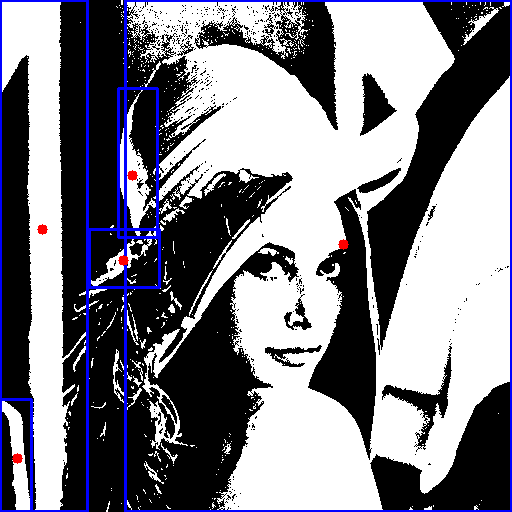

In [ ]:
for grp in IDlist:
  if grp == 0:
    continue
  image = cv2.circle(image, 
              (int(np.round(grp["sum"][1]/grp["count"])), int(np.round(grp["sum"][0]/grp["count"]))), 
              radius=0, 
              color=(0, 0, 255), 
              thickness=10)
  image = cv2.rectangle(image, (grp["left"],grp["up"]), (grp["right"],grp["down"]), (255,0, 0), 2)
cv2_imshow(image)

In [4]:
%%writefile /content/drive/MyDrive/CVHW/HW2.py
import cv2
import matplotlib.pyplot as plt
import numpy as np

lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

#(a)
binarize_lena = lena_gray//128*255
cv2.imwrite('binarize_lena.bmp', binarize_lena)

#(b)
value_count = [0]*256
for row in lena_gray:
  for pix in row:
    value_count[pix]+=1
plt.figure(dpi=500)
plt.bar(list(range(256)),value_count,1)
plt.xlabel("gray level value")
plt.xlim(0,255)
plt.ylabel("count")
plt.savefig('value_count.png')

#(c)
IDlist = []
IDlist.append(0)
IDtable = np.zeros((512,512),dtype=int)
ID = 1
for r, row in enumerate(binarize_lena):
  for c, pix in enumerate(row):
    if pix==0:
      continue
    if r:
      if c and IDtable[r-1,c-1]:
        IDtable[r,c] = IDtable[r-1,c-1]
      elif IDtable[r-1,c]:
        if IDtable[r,c]:
          IDlist[IDtable[r-1,c]]["neighbor"].add(IDtable[r,c])
          IDlist[IDtable[r,c]]["neighbor"].add(IDtable[r-1,c])
        else:
          IDtable[r,c] = IDtable[r-1,c]
      elif c<511 and IDtable[r-1,c+1]:
        if IDtable[r,c]:
          IDlist[IDtable[r-1,c+1]]["neighbor"].add(IDtable[r,c])
          IDlist[IDtable[r,c]]["neighbor"].add(IDtable[r-1,c+1])
        else:
          IDtable[r,c] = IDtable[r-1,c+1]
    if c and IDtable[r,c-1]:
      if IDtable[r,c]:
        IDlist[IDtable[r,c-1]]["neighbor"].add(IDtable[r,c])
        IDlist[IDtable[r,c]]["neighbor"].add(IDtable[r,c-1])
      else:
        IDtable[r,c] = IDtable[r,c-1]
    if not IDtable[r,c]:
      IDtable[r,c] = ID
      ID+=1
      IDlist.append({"up":512,"down":0,"left":512,"right":0,"count":0,"sum":[0,0],"neighbor":set()})
    IDlist[IDtable[r,c]]["up"] = min(IDlist[IDtable[r,c]]["up"],r)
    IDlist[IDtable[r,c]]["down"] = max(IDlist[IDtable[r,c]]["down"],r)
    IDlist[IDtable[r,c]]["left"] = min(IDlist[IDtable[r,c]]["left"],c)
    IDlist[IDtable[r,c]]["right"] = max(IDlist[IDtable[r,c]]["right"],c)
    IDlist[IDtable[r,c]]["count"] += 1
    IDlist[IDtable[r,c]]["sum"][0] += r
    IDlist[IDtable[r,c]]["sum"][1] += c
for i in range(len(IDlist)-1,1,-1):
  if not IDlist[i]['neighbor']:
    continue
  belong = min(IDlist[i]['neighbor'])
  if belong == i:
    continue
  for j in IDlist[i]['neighbor']:
    if i==j:
      continue
    IDlist[j]['neighbor'].add(belong)
    if i in IDlist[j]['neighbor']:
      IDlist[j]['neighbor'].remove(i)
  IDlist[belong]["up"] = min(IDlist[belong]["up"],IDlist[i]["up"])
  IDlist[belong]["down"] = max(IDlist[belong]["down"],IDlist[i]["down"])
  IDlist[belong]["left"] = min(IDlist[belong]["left"],IDlist[i]["left"])
  IDlist[belong]["right"] = max(IDlist[belong]["right"],IDlist[i]["right"])
  IDlist[belong]["count"] += IDlist[i]["count"]
  IDlist[belong]["sum"][0] += IDlist[i]["sum"][0]
  IDlist[belong]["sum"][1] += IDlist[i]["sum"][1]
  IDlist.pop(i)
for i in range(len(IDlist)-1,1,-1):
  if IDlist[i]["count"]<500:
    IDlist.pop(i)
image = cv2.cvtColor(binarize_lena, cv2.COLOR_GRAY2BGR)
for grp in IDlist:
  if grp == 0:
    continue
  image = cv2.circle(image, 
          (int(np.round(grp["sum"][1]/grp["count"])), int(np.round(grp["sum"][0]/grp["count"]))), 
          radius=0, 
          color=(0, 0, 255), 
          thickness=10)
  image = cv2.rectangle(image, (grp["left"],grp["up"]), (grp["right"],grp["down"]), (255,0, 0), 2)
cv2.imwrite('group_of_lena.bmp', image)

Overwriting /content/drive/MyDrive/CVHW/HW2.py
